In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os as os
%matplotlib inline 

In [66]:
titanic_data = pd.read_csv('train.csv')

In [67]:
print(f'Number of records in the training set {len(titanic_data.index)}')

Number of records in the training set 891


Analyzing the data 

<AxesSubplot:xlabel='Survived', ylabel='count'>

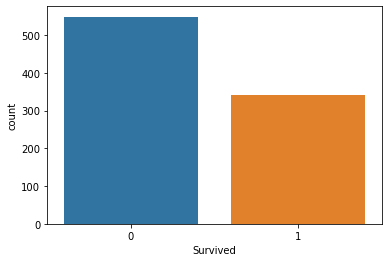

In [68]:
sns.countplot(data= titanic_data, x = "Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

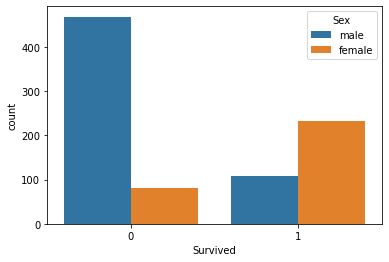

In [69]:
sns.countplot(data = titanic_data, x = "Survived", hue = "Sex")
# majority of the male did not survived 

<AxesSubplot:xlabel='Survived', ylabel='count'>

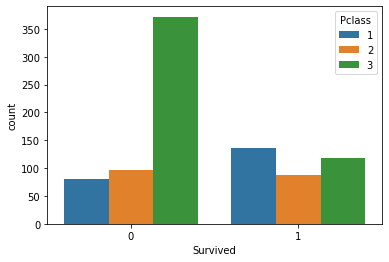

In [70]:
sns.countplot(data = titanic_data, x = "Survived", hue = "Pclass")
# passenger of the 3rd were the most of the who are not able to survive

<AxesSubplot:ylabel='Frequency'>

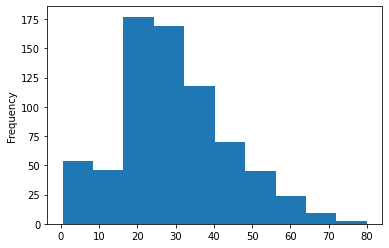

In [71]:
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

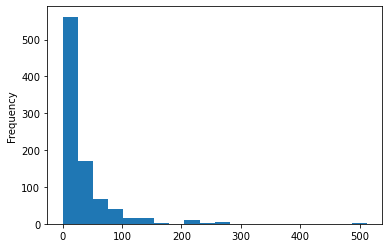

In [72]:
titanic_data["Fare"].plot.hist(bins = 20)

In [73]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

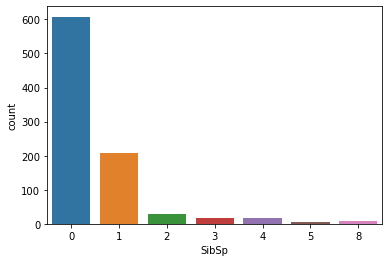

In [74]:
sns.countplot(x = "SibSp", data = titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

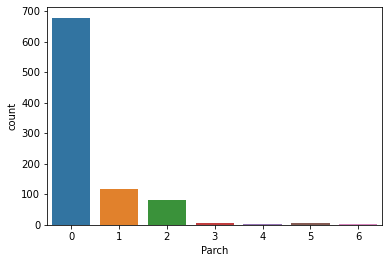

In [75]:
sns.countplot(x = "Parch", data = titanic_data)

Data wrangling (Cleaning)

In [76]:
titanic_data.isnull()
# cabin and embarked has null values 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

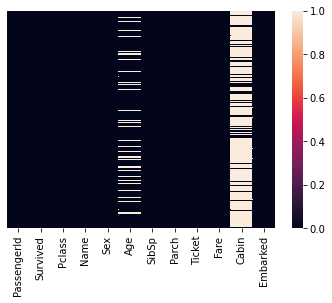

In [78]:
sns.heatmap(titanic_data.isnull(), yticklabels= False)

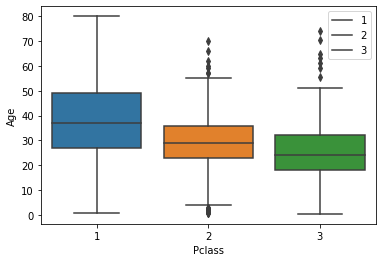

In [79]:
sns.boxplot(x = "Pclass", y ="Age", data = titanic_data)

plt.legend(labels = ["1","2", "3"])

In [80]:
# imputation / either remove or fill the some data for missing values 

In [81]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
titanic_data.drop("Cabin", axis = 1 , inplace = True)

In [83]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [84]:
titanic_data.dropna(inplace = True)

In [85]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
len(titanic_data.index)

712

<AxesSubplot:>

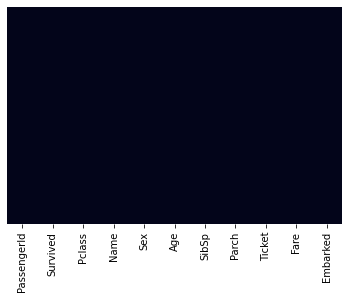

In [87]:
sns.heatmap(titanic_data.isnull(), yticklabels= False, cbar= False)

In [88]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [89]:
# string or categorical values has to be converted to a nuemric value as ml model do not take string/ categorical value.
sex = pd.get_dummies(titanic_data['Sex'], drop_first= True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [90]:
embarked = pd.get_dummies(titanic_data["Embarked"], drop_first= True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [91]:
pClasses = pd.get_dummies(titanic_data["Pclass"], drop_first= True)
pClasses.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [92]:
titanic_data = pd.concat([titanic_data, sex, embarked, pClasses], axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [93]:
titanic_data.drop(["Sex", "Embarked", 'PassengerId', 'Name', "Ticket", "Pclass"], axis = 1, inplace= True)

In [94]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Train and Test Data

In [96]:
x = titanic_data.drop("Survived", axis= 1)
y = titanic_data["Survived"]

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1)

In [101]:
from sklearn.linear_model import LogisticRegression

In [104]:
logModel = LogisticRegression(solver='lbfgs', max_iter=1000)
logModel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [108]:
predictions = logModel.predict(X_test)

In [107]:
# calculate the accuracy - classificaitn report and confusion matrix    
from sklearn.metrics import classification_report 

In [109]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 25,  63]])

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test, predictions)

0.7710280373831776